# Two variable Monte-Carlo exponential mass function integral

In [18]:
# TODO:
# * beta is inaccurate & mass-dep: testing exponential mass function
# * formula is incorrect:
# * numerical inaccuracy of PDF

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
from tqdm import tqdm,trange
import copy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


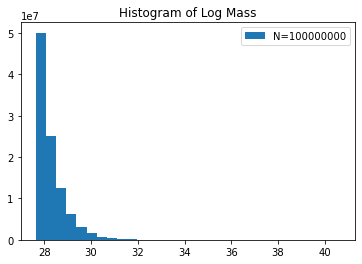

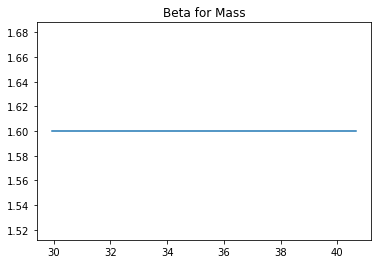

In [20]:
from mass_function import MassFunction

mf = MassFunction(kind="exponential")

In [12]:
from scaling_relation import ScalingRelation

sr = ScalingRelation()

self.alpha_lam=0.939, self.pi_lam=-27.547425726070088, self.scatter_lam=0.36
self.alpha_SZ=1.519, self.pi_SZ=-50.085787147359696, self.scatter_SZ=0.152
self.alpha_Mwl=1, self.pi_Mwl=0, self.scatter_Mwl=0.5


# MonteCarlo

First, Monte Carlo from the covariance matrix and the mean. How does this work?

Second, define a narrow richness bin to mimic the distribution of halo mass given richness. The expectation value given no correlation should be
$$\frac{\lambda-\pi_{\lambda}}{\alpha_{\lambda}}$$

But the downward correction is
$$-(\frac{\sigma_\lambda}{\alpha})^2 \beta$$

Third,


In [21]:
color_list = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:cyan', "gold"]

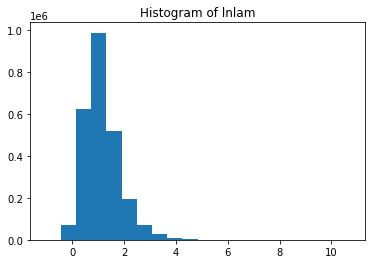

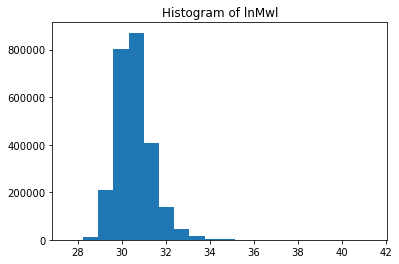

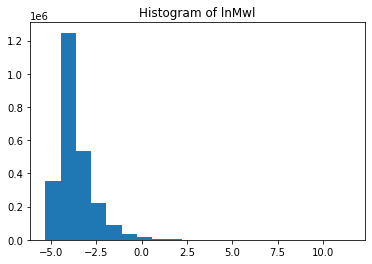

In [22]:
from monte_carlo_observable import MonteCarloObservables

mco = MonteCarloObservables(mass_function=mf,
                            scaling_relation=sr,
                            r=0.5,
                            multiplier=100)

In [15]:
# predicted_lnsig = [None] * len(mco.lnlam)
# for i in trange(len(mco.lnlam)):
#     predicted_lnsig[i] = mco.theory_calculate_mean_mwl_given_lam_sz(mco.lnlam[i],mco.lnSZ[i],correction=True)

# predicted_lnsig = np.array(predicted_lnsig)
# for_csv = {'lnlam':mco.lnlam,'lnsigma':mco.lnMwl,'lnzeta':mco.lnSZ,'predicted_lnsig':predicted_lnsig}
# for_csv_df = pd.DataFrame(data=for_csv)
# for_csv_df.to_csv("../data/csv_for_tianyu")

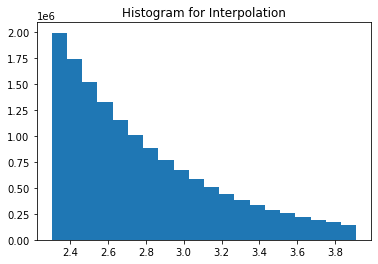

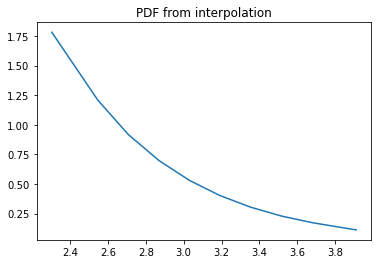

2.302585092994046 3.912023005428146
lam_mid=array([2.39199831, 2.57082475, 2.74965118, 2.92847761, 3.10730405,
       3.28613048, 3.46495692, 3.64378335, 3.82260979])


9it [00:00, 5329.48it/s]

y_array=[49.44785879998335, 36.85478379922738, 27.41261947603568, 20.40641832436635, 15.138016345176217, 11.202350003614828, 8.262254722162577, 6.089488679688233, 4.498257619108298]
np.trapz(np.array(y_array), x=np.array(x_array))=27.242238371052476
Integral before renormalization 31.96569172024331
Integral after renormalization 31.96569172024331
Theory:31.96569172024331 MC:32.213360298126865
The count in the bin is 145696
The log diff is -0.24766857788355523
The percentage error is -21.9381385315631 %


In [34]:
diff, count = mco.mc_calculate_mean_mwl_diff_given_lam_bin(lam1=10,
                                                           lam2=50,
                                                           correction=True,
                                                           NSTEPS=1000)
# lam_array_nc, SZ_array_nc, diff_array_nc, count_array_nc = mco.MC_calculate_mean_Mwl_given_lam_SZ(nbins = NBINS+1,correction=False)

print("The count in the bin is", count)
print("The log diff is", diff)
print("The percentage error is", (np.exp(diff) - 1) * 100, "%")


In [50]:
data = 
points,step = np.linspace(data.min(),data.max(),1000,retstep=True)
sum_w_steps = 0
sum_wo_steps = 0
for point in tqdm(points):
    pdf = np.exp(kde.score_samples(np.array([[point]])))
    sum_wo_steps += pdf
    sum_w_steps += pdf*step
print(sum_w_steps)
print(sum_wo_steps)

SyntaxError: invalid syntax (2234024406.py, line 1)

In [ ]:
print(sum_w_steps)
print(sum_wo_steps)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc="#AAAAFF", density=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc="#AAAAFF", density=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel="tophat", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel("Normalized Density")

for axi in ax[1, :]:
    axi.set_xlabel("x")

# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return "0"
    elif x == 1:
        return "h"
    elif x == -1:
        return "-h"
    else:
        return "%ih" % x

In [ ]:
X
print(X_plot)

In [ ]:
x = np.linspace(np.log(20), np.log(50), 30)
plt.plot(x, mco.P_lam(x))


In [ ]:
print(mco.P_lam(x))

In [ ]:
counts, bins = np.histogram(mco.lnlam, range=(np.log(20), np.log(50)), bins=10)
counts = counts / float(np.sum(counts) * 1.0)
plt.hist(counts, bins)
print(counts)
bin_mid = 0.5 * (bins[0:-1] + bins[1:])
plt.plot(bin_mid, counts)
from scipy.interpolate import interp1d

pdf_lam = interp1d(bin_mid, counts)


In [ ]:
plt.hist(mco.lnSZ, bins=100)
plt.show()

In [ ]:
x = np.linspace(-5, 5, 100)
plt.plot(x, mco.P_SZ.pdf(x))


In [ ]:
plt.plot(x, mco.P_lam.pdf(x))


In [ ]:
print(count_array)
print(np.exp(diff_array))

In [ ]:
print(mco.P_lam.cdf(2.3) - mco.P_lam.cdf(1.6))

In [ ]:
plt.figure(figsize=[12, 8])
for i in range(NBINS):
    plt.plot(range(NBINS),
             np.exp(diff_array[i, :]),
             color=f'{color_list[i]}',
             label=f"$<\zeta> = {np.exp(SZ_array[i]):.3f}$")
    plt.plot(range(NBINS),
             np.exp(diff_array_nc[i, :]),
             "--",
             color=f'{color_list[i]}')
plt.plot([], [], '--', label="Before correlation correction")
plt.legend()
# locs, labels = plt.xticks()
plt.xticks(np.arange(0, NBINS, step=1),
           [f"{np.exp(lam):.2f}" for lam in lam_array])
plt.xlabel("$<\lambda>$")
plt.ylabel(r"$\frac{Mass_{MC}}{Mass_{Theory}}$")
# plt.title("Comparision Before&After r Correction")
plt.show()

In [ ]:
r_array = [0, 0.25, 0.5, 0.75, 0.99]

diff_list = [None] * len(r_array)
lam_list = [None] * len(r_array)
SZ_list = [None] * len(r_array)
count_list = [None] * len(r_array)

diff_list_nc = [None] * len(r_array)
lam_list_nc = [None] * len(r_array)
SZ_list_nc = [None] * len(r_array)
count_list_nc = [None] * len(r_array)

for i in range(len(r_array)):
    mco = MonteCarloObservables(nh,
                                r_array[i],
                                np.log(mf.mass),
                                lnlam_mean=lnlam_mean,
                                lnSZ_mean=lnSZ_mean,
                                lnMwl_mean=lnMwl_mean,
                                scatter_lam=scatter_lam,
                                scatter_Mwl=scatter_Mwl,
                                scatter_SZ=scatter_SZ,
                                mf_slope_interp=mf.beta)
    lam_list[i], SZ_list[i], diff_list[i], count_list[
        i] = mco.MC_calculate_mean_Mwl_given_lam_SZ(nbins=NBINS + 1,
                                                    correction=True)
    lam_list_nc[i], SZ_list_nc[i], diff_list_nc[i], count_list_nc[
        i] = mco.MC_calculate_mean_Mwl_given_lam_SZ(nbins=NBINS + 1,
                                                    correction=False)


In [ ]:
#binned by lambda, marginalize SZ
diff_array_lambda = np.sum(np.array(diff_list), axis=1) / np.sum(
    np.invert(np.array(diff_list) == 0), axis=1)
diff_array_lambda_nc = np.sum(np.array(diff_list_nc), axis=1) / np.sum(
    np.invert(np.array(diff_list_nc) == 0), axis=1)

plt.figure(figsize=[12, 8])
for i in range(len(lam_list[0])):
    plt.plot(
        range(len(r_array)),
        np.exp(diff_array_lambda[:, i]),
        color=f"{color_list[i]}",
        label=f"$<\lambda> = {np.exp(np.mean(np.array(lam_list)[:,i])):.3f}$")
    # plt.plot(range(len(r_array)), np.exp(diff_array_lambda_nc[:,i]), "--", color=f"{color_list[i]}")
plt.plot([], [], '--', label="Before correlation correction")
plt.legend()
locs, labels = plt.xticks()
plt.xticks(np.arange(0, 5, step=1), [f"{r:.2f}" for r in r_array])
plt.xlabel("$r$")
plt.ylabel(r"$\frac{Mass_{MC}}{Mass_{Theory}}$")
plt.title("Difference Binned by $\lambda$")
plt.show()

In [ ]:
plt.hist(np.exp(lnlam_mean), bins=20)
np.min(np.exp(lnlam_mean))

In [ ]:
np.exp(1.5)

In [ ]:
#binned by SZ, marginalize lambda
diff_array_SZ = np.sum(np.array(diff_list), axis=2) / np.sum(
    np.invert(np.array(diff_list) == 0), axis=2)
diff_array_SZ_nc = np.sum(np.array(diff_list_nc), axis=2) / np.sum(
    np.invert(np.array(diff_list_nc) == 0), axis=2)

plt.figure(figsize=[12, 8])
for i in range(len(SZ_list[0])):
    plt.plot(
        range(len(r_array)),
        np.exp(diff_array_SZ[:, i]),
        color=f"{color_list[i]}",
        label=f"$<\zeta> = {np.exp(np.mean(np.array(SZ_list)[:,i])):.3f}$")
    plt.plot(range(len(r_array)),
             np.exp(diff_array_SZ_nc[:, i]),
             "--",
             color=f"{color_list[i]}")
plt.plot([], [], '--', label="Before correlation correction")
plt.legend()
locs, labels = plt.xticks()
plt.xticks(np.arange(0, 5, step=1), [f"{r:.2f}" for r in r_array])
plt.xlabel("$r$")
plt.ylabel(r"$\frac{Mass_{MC}}{Mass_{Theory}}$")
plt.title("Difference Binned by $\zeta$")
plt.show()